<a href="https://colab.research.google.com/github/abhijeetanand9875/Global_Terrorism_Data_Analysis/blob/main/Global_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [17]:
# Importing the data as pandas DataFrame
df = pd.read_excel("/content/drive/MyDrive/Global data.xlsx")

# renaming date time to change type into timestamp later
df = df.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'})

In [19]:
#print the dataset
df

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [20]:
#Top 5 row dataset
df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [21]:
#Transpose data views
df.head().T

,0,1,2,3,4
eventid,197000000001,197000000002,197001000001,197001000002,197001000003
year,1970,1970,1970,1970,1970
month,7,0,1,1,1
day,2,0,0,0,0
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,0,-9,-9,-9
INT_IDEO,0,1,-9,-9,-9
INT_MISC,0,1,1,1,1
INT_ANY,0,1,1,1,1


In [22]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [23]:
#Datatype of datased
df.dtypes

eventid        int64
year           int64
month          int64
day            int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [24]:
#count the duplicate data in dataset
len(df[df.duplicated()])

0

In [25]:
#Null value count
print(df.isnull().sum())

eventid            0
year               0
month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [26]:
# missing values: NaN values in the data

def missing_values():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict

# gives the information of missing values in each of the decorations
len(missing_values())

106

## ***Removing the columns that contain more than half of the missing values***
Let us not even look what the columns are for if they are already missing more than half of the data points missing. The imputation of the missing values in such case might be difficult and missleading.

In [27]:
# First DROPPING the columns that contain more than 50% of its data NaNs

def delete_columns(col):
    if df[col].isnull().sum() > df[col].count()/2:
        del df[col]

for col in df.columns:
    delete_columns(col)

In [29]:
df.head(n=5)

,eventid,year,month,day,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [30]:
#Null value count(After droping some data)
print(df.isnull().sum())

eventid                 0
year                    0
month                   0
day                     0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1

In [32]:
#Datatype of dataset
df.dtypes

eventid               int64
year                  int64
month                 int64
day                   int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual            int64
weaptype1           

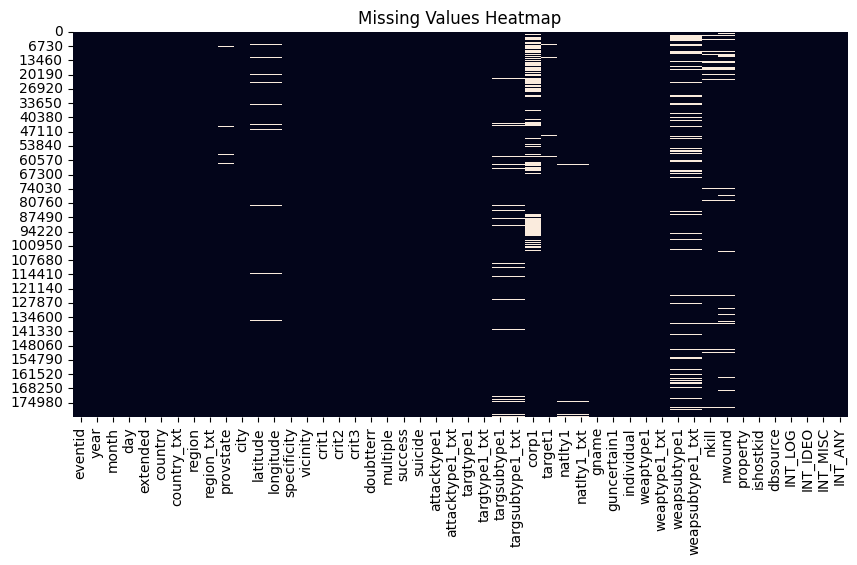

In [31]:
# Visualizing the missing values through heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="rocket")
plt.title('Missing Values Heatmap')
plt.show()

In [36]:
#filling NULL value in 4 column with respective values

df.fillna({"provstate":"NAN"}, inplace=True)
df.fillna({"city":"NAN"}, inplace=True)
df.fillna({"latitude":0}, inplace=True)
df.fillna({"longitude":0}, inplace=True)
df.fillna({"targsubtype1":0}, inplace=True)
df.fillna({"targsubtype1_txt":"NAN"}, inplace=True)
df.fillna({"corp1":'NAN'}, inplace=True)
df.fillna({"target1":'NAN'}, inplace=True)
df.fillna({"natlty1":0}, inplace=True)
df.fillna({"natlty1_txt":"NAN"}, inplace=True)
df.fillna({"guncertain1":0}, inplace=True)
df.fillna({"weapsubtype1":0}, inplace=True)
df.fillna({"weapsubtype1_txt":"NAN"}, inplace=True)
df.fillna({"nkill":0}, inplace=True)
df.fillna({"nwound":0}, inplace=True)
df.fillna({"ishostkid":0}, inplace=True)
df.fillna({"specificity":0}, inplace=True)
df.fillna({"doubtterr":0}, inplace=True)
df.fillna({"multiple":0}, inplace=True)

In [37]:
#checking Null values (after replacing Null value to respective values)
print(df.isnull().sum())

eventid             0
year                0
month               0
day                 0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO  

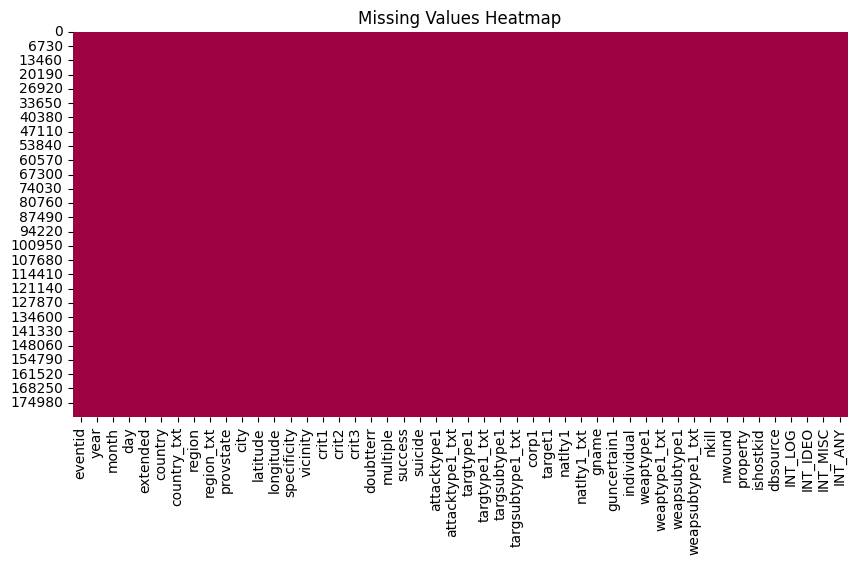

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Spectral')
plt.title('Missing Values Heatmap')
plt.show()